In [96]:
import sklearn
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [97]:
heart = pd.read_csv("Data/heart.csv")

In [98]:
row_to_drop = [449]
heart.drop(row_to_drop, axis= 0, inplace= True)

In [99]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [100]:
heart_1 = pd.get_dummies(heart, columns = ['RestingECG','Sex','ChestPainType', 'ST_Slope', 'ExerciseAngina'])
heart_1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,...,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,0,1,0,...,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,0,1,0,...,1,1,0,0,0,0,1,0,0,1
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [101]:
import sklearn
from sklearn.model_selection import train_test_split

target = heart_1["HeartDisease"]
input_columns = heart_1.loc[:, heart_1.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2, random_state=42)

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
my_naive_model = GaussianNB()

In [104]:
my_naive_model.fit(x_train, y_train)

GaussianNB()

In [105]:
y_hat = my_naive_model.predict(x_test)
y_hat

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1])

<AxesSubplot:>

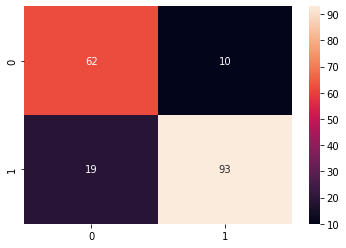

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [20]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.15760869565217392


In [21]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test, y_hat)

0.842391304347826

In [59]:
np.logspace(0,-9, num=50)

array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-03,
       1.15139540e-03, 7.54312006e-04, 4.94171336e-04, 3.23745754e-04,
       2.12095089e-04, 1.38949549e-04, 9.10298178e-05, 5.96362332e-05,
       3.90693994e-05, 2.55954792e-05, 1.67683294e-05, 1.09854114e-05,
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])

In [60]:
from sklearn.model_selection import GridSearchCV

parameters = {'var_smoothing': np.logspace(0,-9, num=50)}
grid = GridSearchCV(my_naive_model, parameters) # model

grid.fit(x_train, y_train)
grid.best_params_

{'var_smoothing': 2.0235896477251557e-06}

In [61]:
y_hat = grid.predict(x_test)

In [62]:
accuracy_score(y_hat, y_test)

0.8586956521739131

<AxesSubplot:>

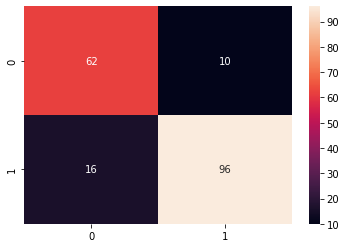

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [73]:
from sklearn.preprocessing import StandardScaler

In [90]:
my_standard_scaler = StandardScaler()
#my_standard_scaler.fit_transform(heart_1)

In [91]:
x_train_scaled = my_standard_scaler.fit_transform(x_train)
x_test_scaled = my_standard_scaler.transform(x_test)

In [92]:
parameters = {'var_smoothing': np.logspace(0,-9, num=50)}
grid = GridSearchCV(my_naive_model, parameters) # model

grid.fit(x_train_scaled, y_train)
grid.best_params_

{'var_smoothing': 0.0517947467923121}

In [93]:
y_hat = grid.predict(x_test_scaled)

In [94]:
accuracy_score(y_hat, y_test)

0.842391304347826

<AxesSubplot:>

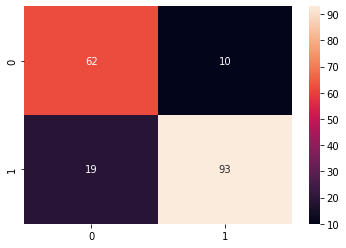

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')